<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.033351,44.194621,48.777119,-874.925437,-704.920346,166.509654,-871.430000
1,0.0,1.0,91.288763,39.640519,96.884818,-206.801798,31.012302,775.240988,-744.228686
2,0.0,2.0,84.824908,97.497732,81.436681,-4083.016406,-3809.257086,-1577.106925,-2232.150161
3,0.0,3.0,30.576914,83.990285,96.621335,-1993.826781,-1772.638247,-905.265440,-867.372806
4,0.0,4.0,75.990545,75.851708,28.061368,857.396873,1047.300494,-1236.857180,2284.157675
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.761304,43.633964,39.571765,-710.537846,-571.570813,260.871580,-832.442393
29996,999.0,26.0,24.736574,44.945368,58.898993,339.084759,477.665694,441.140017,36.525677
29997,999.0,27.0,75.802784,21.187629,51.951858,203.455585,362.397857,31.332687,331.065170
29998,999.0,28.0,66.831195,65.378864,76.474863,308.130183,526.815104,583.189787,-56.374684


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    67.033351  44.194621  ...   166.509654  -871.430000
      1.0    91.288763  39.640519  ...   775.240988  -744.228686
      2.0    84.824908  97.497732  ... -1577.106925 -2232.150161
      3.0    30.576914  83.990285  ...  -905.265440  -867.372806
      4.0    75.990545  75.851708  ... -1236.857180  2284.157675
...                ...        ...  ...          ...          ...
999.0 25.0   45.761304  43.633964  ...   260.871580  -832.442393
      26.0   24.736574  44.945368  ...   441.140017    36.525677
      27.0   75.802784  21.187629  ...    31.332687   331.065170
      28.0   66.831195  65.378864  ...   583.189787   -56.374684
      29.0   67.444132  45.202389  ...   442.956283 -1051.741192

[30000 rows x 7 columns]

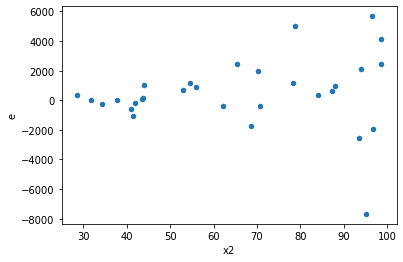

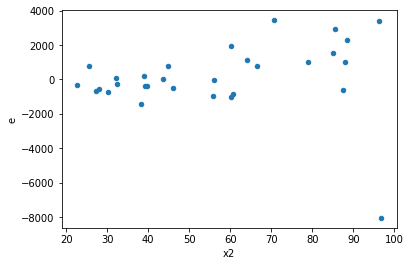

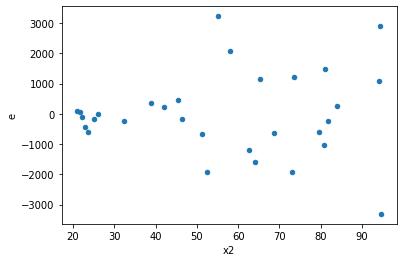

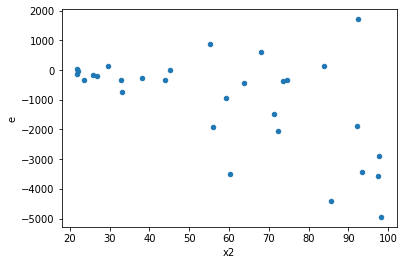

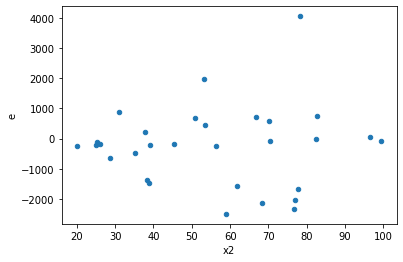

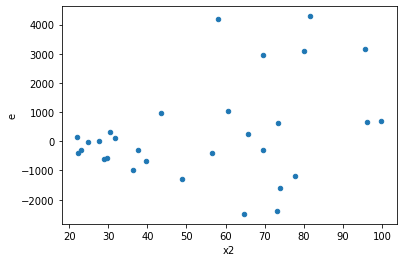

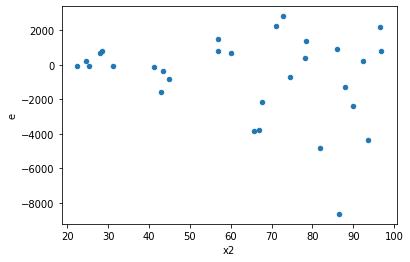

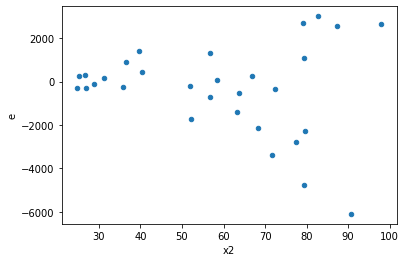

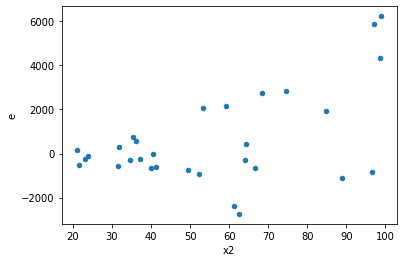

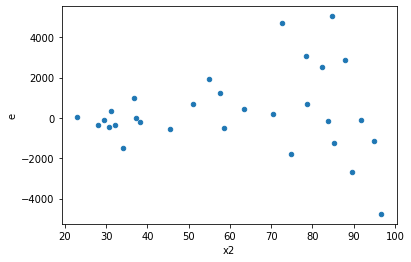

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,9.0,45147440.90731949,87525391.7693032,5016382.323035499,9725043.529922578,1.9386567657063642,0.3383214564756114,0.8308392717621943,0.1691607282378057,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,18406811.209410816,80448924.90969056,2045201.2454900907,8938769.434410062,4.37060629320518,0.038711967162205374,0.9806440164188973,0.019355983581102687,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,14630431.235403303,61102746.29515087,1625603.470600367,6789194.032794541,4.1764145780810615,0.04464079508422358,0.9776796024578882,0.02232039754211179,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,10280042.883754628,54618596.03783675,1142226.9870838476,6068732.893092972,5.313070835934893,0.02048522193134028,0.9897573890343299,0.01024261096567014,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,3775197.641985939,128689279.73265585,419466.40466510435,14298808.859183984,34.088090727074885,1.3583260924709961e-05,0.9999932083695376,6.791630462354981e-06,Reject005=0 : Heteroscedasticity
14.0,9.0,9.0,13931336.150214637,17222550.321953565,1547926.2389127375,1913616.7024392849,1.2362454064887538,0.7572150484127653,0.6213924757936173,0.37860752420638266,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,1806392.7897333005,35040333.67504154,200710.3099703667,3893370.408337949,19.397959222487245,0.00014682390739761964,0.9999265880463012,7.341195369880982e-05,Reject005=0 : Heteroscedasticity
18.0,9.0,9.0,3304950.583163202,55461865.79335054,367216.731462578,6162429.532594505,16.781450856147877,0.00026653069090354364,0.9998667346545482,0.00013326534545177182,Reject005=0 : Heteroscedasticity
19.0,9.0,9.0,12084396.632972764,27617255.504789654,1342710.7369969739,3068583.9449766283,2.2853648670745264,0.23410962092892218,0.8829451895355389,0.11705481046446109,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,49547547.121288665,2038361.6032530842,5505283.013476518,226484.622583676,0.04113950582181856,5.7219498079882225e-05,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,45147440.90731949,87525391.7693032,5016382.323035499,9725043.529922578,1.9386567657063642,0.3383214564756114,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,86351553.8951415,11475602.835857965,9594617.099460166,1275066.9817619962,0.13289399342822517,0.0060442186499257144,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,18406811.209410816,80448924.90969056,2045201.2454900907,8938769.434410062,4.37060629320518,0.038711967162205374,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,14630431.235403303,61102746.29515087,1625603.470600367,6789194.032794541,4.1764145780810615,0.04464079508422358,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,37228414.60860204,6653368.575367372,4136490.5120668933,739263.1750408191,0.17871748354897812,0.017196896806674165,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,10280042.883754628,54618596.03783675,1142226.9870838476,6068732.893092972,5.313070835934893,0.02048522193134028,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,3775197.641985939,128689279.73265585,419466.40466510435,14298808.859183984,34.088090727074885,1.3583260924709961e-05,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,33621241.79741641,22617092.20939134,3735693.533046268,2513010.2454879265,0.6727024642834378,0.5642120141163022,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      518
Reject005=0 : Heteroscedasticity    482
Name: Result_test, dtype: int64